In [1]:
import pandas as pd
from process_results import process_crowdsourcing_data, get_gpt_response
from metrics import calculate_cohens_kappa
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crowd1_df = pd.read_csv("../data/raw_data/crowdsourcing1.csv")
crowd2_df = pd.read_csv("../data/raw_data/crowdsourcing2.csv")
crowd = pd.concat([crowd1_df, crowd2_df]).reset_index(drop=True)
crowd = process_crowdsourcing_data(crowd)
crowd_sample = crowd.groupby(["debate_id", "voter_id"]).sample(1)
crowd_debates = list(crowd.debate_id.unique())
abortion_files = glob.glob("../results/abortion/*/*")

In [3]:
models1 = []
models2 = []
kappas = []

for i, file in enumerate(abortion_files):
    df1 = pd.read_json(file)[["debate_id", "voter_id", "gpt_response"]]
    df1 = df1[df1.debate_id.isin(crowd_debates)]
    if "R" in file:
        df1 = get_gpt_response(df1, reasoning=True)
    else:
        df1 = get_gpt_response(df1)

    name1 = file.split("/")[-1].split(".json")[0]
    for file2 in abortion_files[i:]:
        df2 = pd.read_json(file2)[["debate_id", "voter_id", "gpt_response"]]
        df2 = df2[df2.debate_id.isin(crowd_debates)]

        if "R" in file2:
            df2 = get_gpt_response(df2, reasoning=True)
        else:
            df2 = get_gpt_response(df2)

        name2 = file2.split("/")[-1].split(".json")[0]

        df = df1.merge(df2, on=["debate_id", "voter_id"])[
            ["gpt_response_x", "gpt_response_y"]
        ]

        kappa, _, _ = calculate_cohens_kappa(df)
        models1.append(name1)
        models2.append(name2)
        kappas.append(kappa)

    df = df1.merge(crowd_sample, on=["debate_id", "voter_id"])[["gpt_response", "q2"]]
    kappa, _, _ = calculate_cohens_kappa(df)
    models1.append(name1)
    models2.append("human")
    kappas.append(kappa)

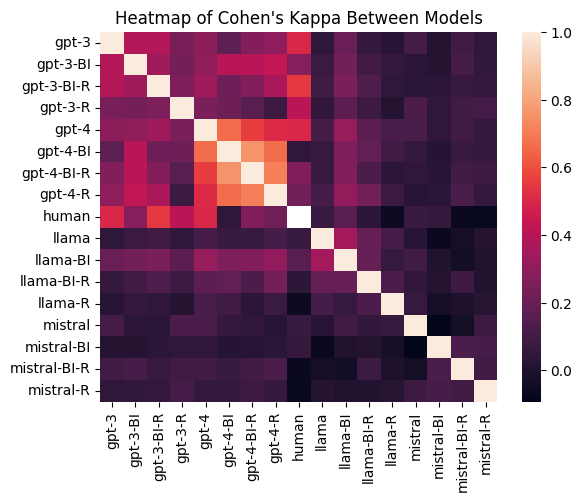

In [4]:
df = pd.DataFrame(
    {
        "models1": models1 + models2,
        "models2": models2 + models1,
        "kappas": kappas + kappas,
    }
)
df = df.drop_duplicates()
df = df.pivot(index="models1", columns="models2", values="kappas")
sns.heatmap(df)
plt.xlabel("")
plt.ylabel("")
plt.title("Heatmap of Cohen's Kappa Between Models")

plt.show()

In [5]:
binary_files = glob.glob("../results/binary_class/*")

In [6]:
models1 = []
models2 = []
kappas = []

for i, file in enumerate(binary_files):
    df1 = pd.read_json(file)[["debate_id", "voter_id", "gpt_response"]]
    df1 = df1[df1.debate_id.isin(crowd_debates)]
    df1 = get_gpt_response(df1)

    name1 = file.split("/")[-1].split(".json")[0]
    for file2 in binary_files[i:]:
        df2 = pd.read_json(file2)[["debate_id", "voter_id", "gpt_response"]]
        df2 = df2[df2.debate_id.isin(crowd_debates)]
        df2 = get_gpt_response(df2)

        name2 = file2.split("/")[-1].split(".json")[0]

        df = df1.merge(df2, on=["debate_id", "voter_id"])[
            ["gpt_response_x", "gpt_response_y"]
        ]

        kappa, _, _ = calculate_cohens_kappa(df)
        models1.append(name1)
        models2.append(name2)
        kappas.append(kappa)

/dlabdata1/rescala/debate-gpt/scripts/metrics.py:91: RuntimeWarning: invalid value encountered in sqrt
  standard_error = np.sqrt(


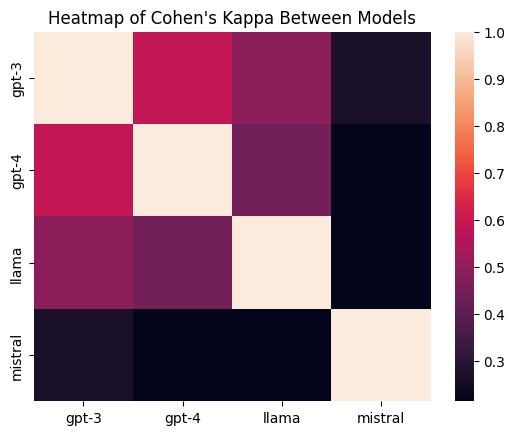

In [7]:
df_binary = pd.DataFrame(
    {
        "models1": models1 + models2,
        "models2": models2 + models1,
        "kappas": kappas + kappas,
    }
)
df_binary = df_binary.drop_duplicates()
df_binary = df_binary.pivot(index="models1", columns="models2", values="kappas")
sns.heatmap(df_binary)
plt.xlabel("")
plt.ylabel("")
plt.title("Heatmap of Cohen's Kappa Between Models")

plt.show()

In [8]:
filesq1 = glob.glob("../results/*/q1/*")
filesq2 = glob.glob("../results/*/q2/*")
filesq3 = glob.glob("../results/*/q3/*")

In [9]:
models1 = []
models2 = []
kappas = []

for i, file in enumerate(filesq1):
    df1 = pd.read_json(file)[["debate_id", "gpt_response"]]
    df1 = df1[df1.debate_id.isin(crowd_debates)]
    df1 = get_gpt_response(df1)

    name1 = file.split("/")[-1].split(".json")[0]
    for file2 in filesq1[i:]:
        df2 = pd.read_json(file2)[["debate_id", "gpt_response"]]
        df2 = df2[df2.debate_id.isin(crowd_debates)]
        df2 = get_gpt_response(df2)

        name2 = file2.split("/")[-1].split(".json")[0]

        df = df1.merge(df2, on=["debate_id"])[["gpt_response_x", "gpt_response_y"]]

        kappa, _, _ = calculate_cohens_kappa(df)
        models1.append(name1)
        models2.append(name2)
        kappas.append(kappa)

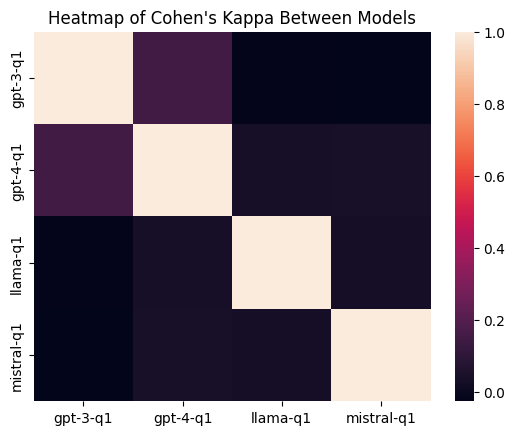

In [10]:
dfq1 = pd.DataFrame(
    {
        "models1": models1 + models2,
        "models2": models2 + models1,
        "kappas": kappas + kappas,
    }
)
dfq1 = dfq1.drop_duplicates()
dfq1 = dfq1.pivot(index="models1", columns="models2", values="kappas")
sns.heatmap(dfq1)
plt.xlabel("")
plt.ylabel("")
plt.title("Heatmap of Cohen's Kappa Between Models")

plt.show()

In [11]:
models1 = []
models2 = []
kappas = []

for i, file in enumerate(filesq2):
    df1 = pd.read_json(file)[["debate_id", "voter_id", "gpt_response"]]
    df1 = df1[df1.debate_id.isin(crowd_debates)]
    df1 = get_gpt_response(df1)

    name1 = file.split("/")[-1].split(".json")[0]
    for file2 in filesq2[i:]:
        df2 = pd.read_json(file2)[["debate_id", "voter_id", "gpt_response"]]
        df2 = df2[df2.debate_id.isin(crowd_debates)]
        df2 = get_gpt_response(df2)

        name2 = file2.split("/")[-1].split(".json")[0]

        df = df1.merge(df2, on=["debate_id", "voter_id"])[
            ["gpt_response_x", "gpt_response_y"]
        ]

        kappa, _, _ = calculate_cohens_kappa(df)
        models1.append(name1)
        models2.append(name2)
        kappas.append(kappa)

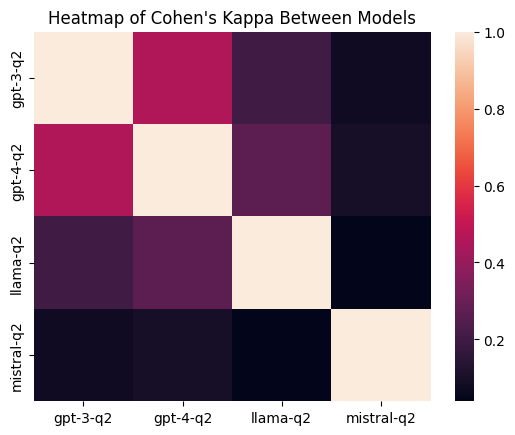

In [12]:
dfq2 = pd.DataFrame(
    {
        "models1": models1 + models2,
        "models2": models2 + models1,
        "kappas": kappas + kappas,
    }
)
dfq2 = dfq2.drop_duplicates()
dfq2 = dfq2.pivot(index="models1", columns="models2", values="kappas")
sns.heatmap(dfq2)
plt.xlabel("")
plt.ylabel("")
plt.title("Heatmap of Cohen's Kappa Between Models")

plt.show()

In [13]:
models1 = []
models2 = []
kappas = []

for i, file in enumerate(filesq3):
    df1 = pd.read_json(file)[["debate_id", "voter_id", "gpt_response"]]
    df1 = df1[df1.debate_id.isin(crowd_debates)]
    df1 = get_gpt_response(df1)

    name1 = file.split("/")[-1].split(".json")[0]
    for file2 in filesq3[i:]:
        df2 = pd.read_json(file2)[["debate_id", "voter_id", "gpt_response"]]
        df2 = df2[df2.debate_id.isin(crowd_debates)]
        df2 = get_gpt_response(df2)

        name2 = file2.split("/")[-1].split(".json")[0]

        df = df1.merge(df2, on=["debate_id", "voter_id"])[
            ["gpt_response_x", "gpt_response_y"]
        ]

        kappa, _, _ = calculate_cohens_kappa(df)
        models1.append(name1)
        models2.append(name2)
        kappas.append(kappa)

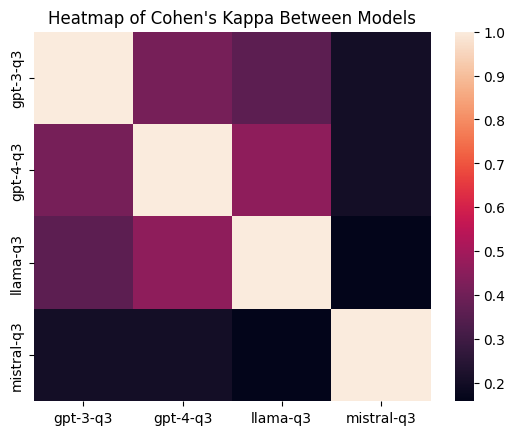

In [14]:
dfq3 = pd.DataFrame(
    {
        "models1": models1 + models2,
        "models2": models2 + models1,
        "kappas": kappas + kappas,
    }
)
dfq3 = dfq3.drop_duplicates()
dfq3 = dfq3.pivot(index="models1", columns="models2", values="kappas")
sns.heatmap(dfq3)
plt.xlabel("")
plt.ylabel("")
plt.title("Heatmap of Cohen's Kappa Between Models")

plt.show()

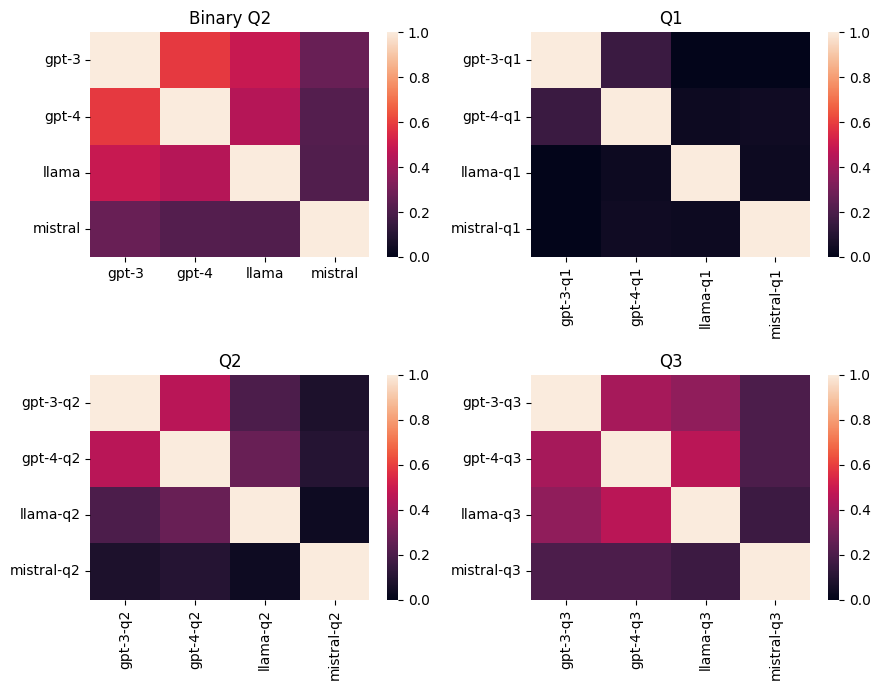

In [37]:
fig, axs = plt.subplots(2,2, figsize=(9, 7), sharex=False, sharey=False)

for ax, df, title in zip(axs.flatten(), [df_binary, dfq1, dfq2, dfq3], ["Binary Q2", "Q1", "Q2", "Q3"]):
    sns.heatmap(df, ax=ax, vmin=0, vmax=1)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()